### NNDL baseline trainings

#### Download the kaggle datasets

In [1]:
#Download the dataset from Dropbox
!wget -O released_data.zip "https://www.dropbox.com/s/c2dvapqb613ukhw/Released_Data-20221201T215316Z-001.zip?dl=0"

#Unzip the train, test and other datasets
!unzip -q released_data.zip
!unzip -q ./Released_Data/test_shuffle.zip
!unzip -q ./Released_Data/train_shuffle.zip

--2022-12-14 18:52:51--  https://www.dropbox.com/s/c2dvapqb613ukhw/Released_Data-20221201T215316Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/c2dvapqb613ukhw/Released_Data-20221201T215316Z-001.zip [following]
--2022-12-14 18:52:51--  https://www.dropbox.com/s/raw/c2dvapqb613ukhw/Released_Data-20221201T215316Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3bd336a8b44ba665af4a906127.dl.dropboxusercontent.com/cd/0/inline/Byr0KnbIw0kpTmhhVyrAq8tYSGJVCDUooUsSjcZHGPuRqOmYhjfFtx543T3q3_17VT-0lUwZMlHcfK9IhkvtNIS7nuNhfpkvac58jp8gFryAYdiwcr8j7CC5uaiN5qzZqL_dXMG2WmOif0Za9A2JQw3rOuNzaizpBkGa987nerKZGQ/file# [following]
--2022-12-14 18:52:52--  https://uc3bd336a8b44ba665af4a906127.dl.dropboxusercontent.com/cd/0/inli

#### Utility Code

In [2]:
import torch

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

print(device)

cpu


#### Dataset and Dataloader preparation

##### Train and Validation data splits

In [3]:
import os
import sys
import numpy as np
import pandas as pd

full_imgs = np.array(os.listdir('./train_shuffle'))
full_labels = pd.read_csv('./Released_Data/train_data.csv').to_numpy()

labels_list = [set(),set(),set()]

#prepare lists based on the super classes
labels_list = [{}, {}, {}]
val_labels_list = [{}, {}, {}]

for i in range(len(full_labels)):
    if full_labels[i][2] in labels_list[full_labels[i][1]]:
        labels_list[full_labels[i][1]][full_labels[i][2]] += 1
    else:
        labels_list[full_labels[i][1]][full_labels[i][2]] = 1
        val_labels_list[full_labels[i][1]][full_labels[i][2]] = 0

# Check the number of times each sub class appears
print(dict(sorted(labels_list[0].items(), key=lambda item: item[1])))
print(dict(sorted(labels_list[1].items(), key=lambda item: item[1])))
print(dict(sorted(labels_list[2].items(), key=lambda item: item[1])))

#Splitting the train and validation datasets (90 - 10 split)
train_imgs = []
val_imgs = []

for i in range(len(full_labels)):
    if val_labels_list[full_labels[i][1]][full_labels[i][2]] <= (0.1)*(labels_list[full_labels[i][1]][full_labels[i][2]]):
        val_labels_list[full_labels[i][1]][full_labels[i][2]] += 1
        val_imgs.append(full_labels[i][0])
    else:
        train_imgs.append(full_labels[i][0])

#Check if there is any common image between training and validation datasets
common_names = [name for name in train_imgs if name in val_imgs]
print("Common names: ", common_names)

train_data = full_labels[np.isin(full_labels[:, 0], train_imgs)]
val_data = full_labels[np.isin(full_labels[:, 0], val_imgs)]

#Check if there is any name missing from the training dataset
ver_train_names = train_data[:, 0]
error_names = [name for name in ver_train_names if name not in train_imgs]
print("Error names: ", error_names)

print("Total number of images: ", len(full_imgs))
print("Number of training images: ", train_data.shape)
print("Number of validation images: ", val_data.shape)
# print(type(train_data[0][0]))
# print(type(train_data[0][1]))
# print(type(val_data[0][0]))
# print(type(val_data[0][1]))


# --------Code to check the distribution of super and sub classes in the training and validation datasets---------
# train_sub_dict = {}
# train_super_dict = {}
# val_sub_dict = {}
# val_super_dict = {}

# for i in range(full_labels.shape[0]):
#     name = full_labels[i][0]
#     super_class = full_labels[i][1]
#     sub_class = full_labels[i][2]

#     if name in val_data[:, 0]:
#         if super_class in val_super_dict:
#             val_super_dict[super_class] += 1
#         else:
#             val_super_dict[super_class] = 1
        
#         if sub_class in val_sub_dict:
#             val_sub_dict[sub_class] += 1
#         else:
#             val_sub_dict[sub_class] = 1
#     else:
#         if super_class in train_super_dict:
#             train_super_dict[super_class] += 1
#         else:
#             train_super_dict[super_class] = 1
        
#         if sub_class in train_sub_dict:
#             train_sub_dict[sub_class] += 1
#         else:
#             train_sub_dict[sub_class] = 1

# print("Super Class distribution:")
# for k in val_super_dict:
#     print("Class: ", k, " Validation: ", val_super_dict[k], " Train: ", train_super_dict[k], " Ratio: ", train_super_dict[k]/val_super_dict[k])

# print("------------------------------")
# print("Sub Class distribution:")
# min_val = 10000
# max_val = -1
# for k in val_sub_dict:
#     min_val = min(min_val, train_sub_dict[k]/val_sub_dict[k])
#     max_val = max(max_val, train_sub_dict[k]/val_sub_dict[k])
#     print("Class: ", k, " Validation: ", val_sub_dict[k], " Train: ", train_sub_dict[k], " Ratio: ", train_sub_dict[k]/val_sub_dict[k])

# print("Minimum Sub Class ratio: ", min_val)
# print("Maximum Sub Class ratio: ", max_val)



{74: 51, 11: 51, 14: 51, 5: 51, 41: 51, 16: 51, 85: 51, 52: 51, 40: 51, 57: 51, 79: 51, 82: 51, 42: 51, 88: 51, 8: 51, 26: 51, 20: 51, 60: 51, 61: 51, 81: 51, 84: 51, 19: 51, 24: 100, 30: 100, 27: 100, 6: 100, 28: 100, 76: 100, 86: 100, 4: 100}
{12: 50, 38: 50, 10: 50, 45: 50, 80: 50, 87: 50, 23: 50, 32: 50, 9: 50, 17: 50, 2: 50, 55: 50, 78: 50, 54: 50, 0: 50, 25: 50, 63: 100, 49: 100, 22: 100, 18: 100, 7: 100, 66: 100, 71: 100, 37: 100, 65: 100, 31: 100, 21: 100, 46: 100, 36: 100}
{48: 50, 68: 50, 69: 50, 75: 50, 3: 50, 56: 50, 33: 50, 34: 50, 39: 50, 13: 50, 15: 50, 72: 100, 43: 100, 1: 100, 53: 100, 67: 100, 58: 100, 59: 100, 35: 100, 70: 100, 73: 100, 77: 100, 51: 100, 64: 100, 44: 100, 29: 100, 50: 100, 83: 100, 62: 100, 47: 100}
Common names:  []
Error names:  []
Total number of images:  6472
Number of training images:  (5738, 3)
Number of validation images:  (734, 3)


##### Information about the images in the dataset

328.jpg 1 78 (64, 64, 3)
<class 'numpy.ndarray'> (64, 64, 3)


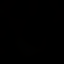

0.jpg 1 63 (64, 64, 3)


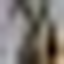

8174.jpg (64, 64, 3)


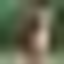

In [8]:
import os
import sys
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import albumentations as A

full_test_imgs = os.listdir("./test_shuffle")

train_img = cv2.imread(os.path.join('train_shuffle', train_data[0][0]), cv2.IMREAD_UNCHANGED)
train_img = cv2.resize(train_img, (64, 64), interpolation = cv2.INTER_CUBIC)
print(train_data[0][0], train_data[0][1], train_data[0][2], train_img.shape)
transform_data = A.Compose([A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, p=1)])
train_img = transform_data(image = train_img)['image']
print(type(train_img), train_img.shape)
cv2_imshow(train_img)

val_img = cv2.imread(os.path.join('train_shuffle', val_data[0][0]), cv2.IMREAD_UNCHANGED)
val_img = cv2.resize(val_img, (64, 64), interpolation = cv2.INTER_CUBIC)
print(val_data[0][0], val_data[0][1], val_data[0][2], val_img.shape)
cv2_imshow(val_img)

test_img = cv2.imread(os.path.join('test_shuffle', full_test_imgs[0]), cv2.IMREAD_UNCHANGED)
test_img = cv2.resize(test_img, (64, 64), interpolation = cv2.INTER_CUBIC)
print(full_test_imgs[0], test_img.shape)
cv2_imshow(test_img)


##### KaggleDataset

In [68]:
import os
import sys
import pandas as pd
import cv2
import torch
import torch.nn as nn

import albumentations as A
from albumentations.pytorch import ToTensorV2

class KaggleDataset(nn.Module):
    def __init__(self, mode = 'train'):
        super(KaggleDataset, self).__init__()
        self.mode = mode

        if mode == 'train':
            self.dataset = train_data
        else:
            self.dataset = val_data
    
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img_name = self.dataset[idx][0]
        img = cv2.imread(os.path.join('train_shuffle', img_name))
        #for now resize the image to 64 x 64 using CUBIC interpolation
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_CUBIC)   
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    #convert image from BGR to RGB format

        super_class = torch.tensor(self.dataset[idx][1], dtype = torch.float32)
        sub_class = torch.tensor(self.dataset[idx][2], dtype = torch.float32)

        apply_transform = self.transform_data()
        image = apply_transform(image = img)['image']

        return image, super_class, sub_class

    def transform_data(self):

        if self.mode == 'train':
            transform_func = A.Compose(
              [
                  #always resize the image to 329x224
                  #A.Resize(height = 329, width= 224, interpolation = cv2.INTER_AREA, p=1),
                  A.HorizontalFlip(p=0.4),  
                  A.ShiftScaleRotate(shift_limit=0.025, scale_limit=0, rotate_limit=15, p=0.5),
                  #A.RandomCrop(height = 224, width = 224, p=1),
                  #randomly change brightness, contrast, and saturation of the image 50% of the time
                  A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue = 0, p=0.5), 
                  A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, p=1), 
                  ToTensorV2(p=1),
              ])
        else:     #augmentations during validation and testing
          transform_func = A.Compose(
          [
              #always resize the image to 329x224
              #A.Resize(height = 329, width = 224, p=1),   
              A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, p=1),
              ToTensorV2(p=1),
          ])
    
        return transform_func

##### KaggleDataloader

In [69]:
from torch.utils.data import DataLoader

train_dataset = KaggleDataset(mode='train')
val_dataset = KaggleDataset(mode='val')
    
train_loader = DataLoader(dataset = train_dataset, batch_size = 32, shuffle = True, num_workers = 8, pin_memory = True)
val_loader = DataLoader(dataset = val_dataset, batch_size = 32, shuffle = False)

# print(len(train_loader))
# print(len(val_loader))

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#### Load the tensorboard

In [39]:
#!pip3 install tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.1 at http://localhost:6006/ (Press CTRL+C to quit)


In [ ]:
!rm -rf runs
%load_ext tensorboard
%tensorboard --logdir runs

#### Training utility functions

In [78]:
# Will contain utility functions used for training the model
import torch
import os
import copy
from tqdm import tqdm
from time import sleep
from torch.utils.tensorboard import SummaryWriter
import time

#Training Function
def fit_classifier(model, train_loader, val_loader, optimizer, loss_func, epochs=10, initial_epoch=0, device='cpu', name='effnetb6'):
    '''
    function to train a classifier model.
    args:
        model - the model to be trained
        train_loader - Dataloader() for train set
        val_loader - Dataloader() for val set
        optimizer - optimization algorithm for updating weights
        loss_func - loss function to be used
    
    keyword args:
        epochs - Number of training epochs (default=10)
        initial_epoch - The starting epoch
        device - the device for training (default='cpu')
        name - Name for saving the model
    
    returns: Nothing
    
    '''
    
    model = model.to(device, non_blocking=True)
    
    # Save the models based on the super and sub class validation accuracies
    best_super_acc = torch.tensor([0.]).to(device, non_blocking=True)
    best_sub_acc = torch.tensor([0.]).to(device, non_blocking=True)
    
    #create the logger object
    writer = SummaryWriter()
    start_time = time.time()
    
    #Iterate epochs
    for epoch in range(initial_epoch, initial_epoch + epochs):
        #Each epoch has a training phase and validation phase
        for phase in ['train','val']:
            data_loader = None
            if phase == 'train':
                #Set train mode
                model.train()
                data_loader = train_loader
            else:
                #Set Eval mode
                model.eval()
                data_loader = val_loader
          
            running_super_loss = 0.
            running_sub_loss = 0.
            running_super_corrects = torch.tensor([0.]).to(device, non_blocking=True)
            running_sub_corrects = torch.tensor([0.]).to(device, non_blocking=True)
            
            #tqdm for observing the progress
            with tqdm(data_loader, unit="batch") as tepoch:
                #Iterate batches
                for itr, (images, super_labels, sub_labels) in enumerate(tepoch):
                    tepoch.set_description(f"Epoch {(epoch+1)} {phase}")
                    images = images.to(device, non_blocking=True)

                    super_labels = super_labels.long().to(device, non_blocking=True)
                    sub_labels = sub_labels.long().to(device, non_blocking=True)
                    
                    optimizer.zero_grad()
                    
                    #Set gradient calculation only for training phase
                    with torch.set_grad_enabled(phase == 'train'):
                        super_outputs, sub_outputs = model(images)

                        super_loss = loss_func(super_outputs, super_labels)
                        sub_loss = loss_func(sub_outputs, sub_labels)

                        super_preds = torch.argmax(super_outputs, dim=1)
                        sub_preds = torch.argmax(sub_outputs, dim=1)

                        loss = 5 * super_loss + sub_loss
                        
                        #Do backprop only during training
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()
                    
                    running_super_loss += 5 * super_loss.item() * images.size(0)
                    running_sub_loss += sub_loss.item() * images.size(0)
                    running_super_corrects += torch.sum(super_preds == super_labels)
                    running_sub_corrects += torch.sum(sub_preds == sub_labels)
                    
                    if phase == 'train':
                        writer.add_scalar("Batch_Loss/" + phase, loss.item(), epoch * len(data_loader) + itr)
                        writer.add_scalar("Batch_Accuracy_Super_Class/" + phase,
                                          (torch.sum(super_preds == super_labels)/(images.shape[0])).item(),
                                          epoch * len(data_loader) + itr)
                        writer.add_scalar("Batch_Accuracy_Sub_Class/" + phase,
                                          (torch.sum(sub_preds == sub_labels)/(images.shape[0])).item(),
                                          epoch * len(data_loader) + itr)
                    
                    tepoch.set_postfix(loss=loss.item(),
                              super_class_accuracy=(torch.sum(super_preds == super_labels)/(images.shape[0])).item(),
                              sub_class_accuracy=(torch.sum(sub_preds == sub_labels)/(images.shape[0])).item())
                
                epoch_super_loss = running_super_loss / len(data_loader.dataset)
                epoch_sub_loss = running_sub_loss / len(data_loader.dataset)
                epoch_super_acc = running_super_corrects.float() / (len(data_loader.dataset))
                epoch_sub_acc = running_sub_corrects.float() / (len(data_loader.dataset))

                print(f"Epoch {(epoch+1)} {phase} Super Class loss: {epoch_super_loss} Super Class acc: {epoch_super_acc.item()} Sub Class loss: {epoch_sub_loss} Sub Class acc: {epoch_sub_acc.item()}")
                
                writer.add_scalar("Epoch_Loss_Super_Class/" + phase, epoch_super_loss, epoch)
                writer.add_scalar("Epoch_Loss_Sub_Class/" + phase, epoch_sub_loss, epoch)
                writer.add_scalar("Epoch_Accuracy_Super_Class/" + phase, epoch_super_acc, epoch)
                writer.add_scalar("Epoch_Accuracy_Sub_Class/" + phase, epoch_sub_acc, epoch)
                
                #Saving best model based on super class accuracy
                if phase == 'val' and epoch_super_acc > best_super_acc:
                    best_super_acc = epoch_super_acc
                    os.makedirs('./models', exist_ok = True)
                    torch.save({      
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                    }, f"./models/{name}_SuperClass.pth")

                #Saving best model based on sub class accuracy
                if phase == 'val' and epoch_sub_acc > best_sub_acc:
                    best_sub_acc = epoch_sub_acc
                    # os.makedirs('./models', exist_ok = True)
                    # torch.save({      
                    #     'epoch': epoch,
                    #     'model_state_dict': model.state_dict(),
                    # }, f"./models/{name}_SubClass.pth")    
                
        print('-'*20)
    
    #End of Training 
    end_time = time.time()  
    writer.close()
    print('Best Super Class val acc: {}'.format(best_super_acc.item()))
    print('Best Sub Class val acc: {}'.format(best_sub_acc.item()))
    print(f"Average Time taken for an epoch: {(end_time - start_time)/epochs} sec")
    
    return

#### Create the baseline model

In [71]:
import torch
import torch.nn as nn
import torchvision
from torchsummary import summary

# Load the EfficientNetB3 model trained on ImageNet
backbone_model = torchvision.models.efficientnet_b3(weights='IMAGENET1K_V1')
backbone_model.classifier = nn.Identity()

# input = torch.rand((1, 3, 64, 64))
# output = backbone_model(input)
# print(output.shape)

class BaselineModel(nn.Module):
    def __init__(self, backbone) -> None:
        super().__init__()
        self.backbone = backbone
        # 3 super classes and 89 + 1 (novel) sub classes
        self.superclass = nn.Linear(in_features = 1536, out_features = 3)
        self.subclass = nn.Linear(in_features = 1536, out_features = 90)
    
    def forward(self, x):
        out = self.backbone(x)
        super_class_out = self.superclass(out)
        sub_class_out = self.subclass(out)
        return super_class_out, sub_class_out

# Create the baseline EfficientNetB6 model
baseline_model = BaselineModel(backbone_model)
baseline_model = baseline_model.to(device, non_blocking = True)

#### Train the baseline model

##### Freeze all the layers except Classifier layers (phase 1)

In [79]:
# Training baseline EfficientNetB6 model (with all backbone frozen)
for param in baseline_model.parameters():
    param.requires_grad = True

for param in baseline_model.backbone.parameters():
    param.requires_grad = False

summary(baseline_model, (3, 64, 64))

trainable_params = []

for name, param in baseline_model.named_parameters():
    if param.requires_grad:
        #print(name)
        trainable_params.append(param)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 40, 32, 32]           1,080
       BatchNorm2d-2           [-1, 40, 32, 32]              80
              SiLU-3           [-1, 40, 32, 32]               0
            Conv2d-4           [-1, 40, 32, 32]             360
       BatchNorm2d-5           [-1, 40, 32, 32]              80
              SiLU-6           [-1, 40, 32, 32]               0
 AdaptiveAvgPool2d-7             [-1, 40, 1, 1]               0
            Conv2d-8             [-1, 10, 1, 1]             410
              SiLU-9             [-1, 10, 1, 1]               0
           Conv2d-10             [-1, 40, 1, 1]             440
          Sigmoid-11             [-1, 40, 1, 1]               0
SqueezeExcitation-12           [-1, 40, 32, 32]               0
           Conv2d-13           [-1, 24, 32, 32]             960
      BatchNorm2d-14           [-1, 24,

In [85]:
epochs = 5
initial_epoch = 0
learning_rate = 1e-4
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(trainable_params, lr=learning_rate)

fit_classifier(
    baseline_model, 
    train_loader=train_loader, 
    val_loader=val_loader,
    optimizer=optimizer, 
    loss_func=loss_func, 
    epochs=epochs,
    initial_epoch=initial_epoch, 
    device=device,
    name='Baseline_EfficientNetB6_frozen'
)

Epoch 1 train: 100%|██████████| 180/180 [00:10<00:00, 16.69batch/s, loss=11.4, sub_class_accuracy=0, super_class_accuracy=0.2]


Epoch 1 train Super Class loss: 4.52763550453545 Super Class acc: 0.5848727822303772 Sub Class loss: 3.836384186224474 Sub Class acc: 0.12094806134700775


Epoch 1 val: 100%|██████████| 23/23 [00:00<00:00, 24.37batch/s, loss=8.7, sub_class_accuracy=0.0667, super_class_accuracy=0.567]


Epoch 1 val Super Class loss: 6.431831156362954 Super Class acc: 0.583106279373169 Sub Class loss: 5.812095236713295 Sub Class acc: 0.058583106845617294
--------------------


Epoch 2 train: 100%|██████████| 180/180 [00:10<00:00, 16.78batch/s, loss=7.07, sub_class_accuracy=0.1, super_class_accuracy=0.6]


Epoch 2 train Super Class loss: 4.457925346388805 Super Class acc: 0.5876612067222595 Sub Class loss: 3.799652402681023 Sub Class acc: 0.12356221675872803


Epoch 2 val: 100%|██████████| 23/23 [00:00<00:00, 25.32batch/s, loss=9.55, sub_class_accuracy=0.0333, super_class_accuracy=0.5]


Epoch 2 val Super Class loss: 4.953794697812207 Super Class acc: 0.5980926156044006 Sub Class loss: 4.846021450832689 Sub Class acc: 0.0544959120452404
--------------------


Epoch 3 train: 100%|██████████| 180/180 [00:10<00:00, 16.69batch/s, loss=6.25, sub_class_accuracy=0.1, super_class_accuracy=0.8]


Epoch 3 train Super Class loss: 4.54076165613209 Super Class acc: 0.5758103728294373 Sub Class loss: 3.805918584014531 Sub Class acc: 0.11868246644735336


Epoch 3 val: 100%|██████████| 23/23 [00:00<00:00, 25.36batch/s, loss=9.21, sub_class_accuracy=0.1, super_class_accuracy=0.567]


Epoch 3 val Super Class loss: 5.316583833350148 Super Class acc: 0.5517711043357849 Sub Class loss: 5.2063005678660215 Sub Class acc: 0.05177111551165581
--------------------


Epoch 4 train: 100%|██████████| 180/180 [00:10<00:00, 16.61batch/s, loss=13.1, sub_class_accuracy=0, super_class_accuracy=0.2]


Epoch 4 train Super Class loss: 4.4965760339715 Super Class acc: 0.5843499302864075 Sub Class loss: 3.8103100087593638 Sub Class acc: 0.11972812563180923


Epoch 4 val: 100%|██████████| 23/23 [00:00<00:00, 24.29batch/s, loss=8.95, sub_class_accuracy=0.0667, super_class_accuracy=0.567]


Epoch 4 val Super Class loss: 4.918244317864202 Super Class acc: 0.5490463376045227 Sub Class loss: 5.702905939450381 Sub Class acc: 0.05040871724486351
--------------------


Epoch 5 train: 100%|██████████| 180/180 [00:10<00:00, 16.64batch/s, loss=9.05, sub_class_accuracy=0.1, super_class_accuracy=0.7]


Epoch 5 train Super Class loss: 4.439016307696685 Super Class acc: 0.5914952754974365 Sub Class loss: 3.78817893553794 Sub Class acc: 0.12391076982021332


Epoch 5 val: 100%|██████████| 23/23 [00:00<00:00, 24.54batch/s, loss=8.99, sub_class_accuracy=0.0333, super_class_accuracy=0.633]


Epoch 5 val Super Class loss: 6.974654612651638 Super Class acc: 0.5749318599700928 Sub Class loss: 5.994382476286927 Sub Class acc: 0.057220708578825
--------------------
Best Super Class val acc: 0.5980926156044006
Best Sub Class val acc: 0.058583106845617294
Average Time taken for an epoch: 11.811307811737061 sec


##### Unfreeze some layers of the backbone network (phase 2)

In [92]:
# Training baseline EfficientNetB6 model (with some backbone frozen)
for param in baseline_model.parameters():
    param.requires_grad = True

# summary(baseline_model.backbone, (3, 64, 64))
# print(baseline_model.backbone)
for param in baseline_model.backbone.features[6:].parameters():
    param.requires_grad = False

summary(baseline_model, (3, 64, 64))

trainable_params = []

for name, param in baseline_model.named_parameters():
    if param.requires_grad:
        #print(name)
        trainable_params.append(param)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 40, 32, 32]           1,080
       BatchNorm2d-2           [-1, 40, 32, 32]              80
              SiLU-3           [-1, 40, 32, 32]               0
            Conv2d-4           [-1, 40, 32, 32]             360
       BatchNorm2d-5           [-1, 40, 32, 32]              80
              SiLU-6           [-1, 40, 32, 32]               0
 AdaptiveAvgPool2d-7             [-1, 40, 1, 1]               0
            Conv2d-8             [-1, 10, 1, 1]             410
              SiLU-9             [-1, 10, 1, 1]               0
           Conv2d-10             [-1, 40, 1, 1]             440
          Sigmoid-11             [-1, 40, 1, 1]               0
SqueezeExcitation-12           [-1, 40, 32, 32]               0
           Conv2d-13           [-1, 24, 32, 32]             960
      BatchNorm2d-14           [-1, 24,

In [93]:
epochs = 5
initial_epoch = 5
learning_rate = 3e-4
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(trainable_params, lr=learning_rate)

fit_classifier(
    baseline_model, 
    train_loader=train_loader, 
    val_loader=val_loader,
    optimizer=optimizer, 
    loss_func=loss_func, 
    epochs=epochs,
    initial_epoch=initial_epoch, 
    device=device,
    name='Baseline_EfficientNetB6_semi_frozen'
)

Epoch 6 train: 100%|██████████| 180/180 [00:22<00:00,  7.96batch/s, loss=8.73, sub_class_accuracy=0.1, super_class_accuracy=0.6]


Epoch 6 train Super Class loss: 4.3015292106126815 Super Class acc: 0.6084001064300537 Sub Class loss: 3.8101656058807745 Sub Class acc: 0.1265249252319336


Epoch 6 val: 100%|██████████| 23/23 [00:01<00:00, 18.11batch/s, loss=13.1, sub_class_accuracy=0.0333, super_class_accuracy=0.667]


Epoch 6 val Super Class loss: 11.775570302308418 Super Class acc: 0.611716628074646 Sub Class loss: 10.783954441060162 Sub Class acc: 0.07765667140483856
--------------------


Epoch 7 train: 100%|██████████| 180/180 [00:24<00:00,  7.20batch/s, loss=9.08, sub_class_accuracy=0.1, super_class_accuracy=0.4]


Epoch 7 train Super Class loss: 3.797858584920219 Super Class acc: 0.6697455644607544 Sub Class loss: 3.6688409130013997 Sub Class acc: 0.13332171738147736


Epoch 7 val: 100%|██████████| 23/23 [00:00<00:00, 23.54batch/s, loss=7.45, sub_class_accuracy=0.0667, super_class_accuracy=0.767]


Epoch 7 val Super Class loss: 4.148335873431016 Super Class acc: 0.6716620922088623 Sub Class loss: 4.181522005585299 Sub Class acc: 0.09673024713993073
--------------------


Epoch 8 train: 100%|██████████| 180/180 [00:21<00:00,  8.56batch/s, loss=8.2, sub_class_accuracy=0.2, super_class_accuracy=0.8]


Epoch 8 train Super Class loss: 3.5740054845186675 Super Class acc: 0.6960613131523132 Sub Class loss: 3.5823437088081835 Sub Class acc: 0.14447543025016785


Epoch 8 val: 100%|██████████| 23/23 [00:01<00:00, 19.13batch/s, loss=7.57, sub_class_accuracy=0.133, super_class_accuracy=0.767]


Epoch 8 val Super Class loss: 3.582136885184358 Super Class acc: 0.7098092436790466 Sub Class loss: 4.100236953766534 Sub Class acc: 0.1130790188908577
--------------------


Epoch 9 train: 100%|██████████| 180/180 [00:20<00:00,  8.69batch/s, loss=8.13, sub_class_accuracy=0.1, super_class_accuracy=0.6]


Epoch 9 train Super Class loss: 3.4030174924422325 Super Class acc: 0.7147089242935181 Sub Class loss: 3.517515592518564 Sub Class acc: 0.15528059005737305


Epoch 9 val: 100%|██████████| 23/23 [00:00<00:00, 24.05batch/s, loss=6.55, sub_class_accuracy=0.1, super_class_accuracy=0.8]


Epoch 9 val Super Class loss: 3.3668457787758 Super Class acc: 0.7247956395149231 Sub Class loss: 3.9257988851791508 Sub Class acc: 0.10626702755689621
--------------------


Epoch 10 train: 100%|██████████| 180/180 [00:20<00:00,  8.92batch/s, loss=8.97, sub_class_accuracy=0.3, super_class_accuracy=0.8]


Epoch 10 train Super Class loss: 3.1121588305921746 Super Class acc: 0.7427675127983093 Sub Class loss: 3.4141397054040006 Sub Class acc: 0.16800278425216675


Epoch 10 val: 100%|██████████| 23/23 [00:00<00:00, 23.20batch/s, loss=6.88, sub_class_accuracy=0.0667, super_class_accuracy=0.867]


Epoch 10 val Super Class loss: 3.3224728963355603 Super Class acc: 0.7411444187164307 Sub Class loss: 3.781241007656752 Sub Class acc: 0.10081743448972702
--------------------
Best Super Class val acc: 0.7411444187164307
Best Sub Class val acc: 0.1130790188908577
Average Time taken for an epoch: 23.161780738830565 sec


##### Unfreeze all the layers in the network (phase 3)

In [94]:
# Training baseline EfficientNetB6 model (with some backbone frozen)
for param in baseline_model.parameters():
    param.requires_grad = True

summary(baseline_model, (3, 64, 64))

trainable_params = []

for name, param in baseline_model.named_parameters():
    if param.requires_grad:
        #print(name)
        trainable_params.append(param)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 40, 32, 32]           1,080
       BatchNorm2d-2           [-1, 40, 32, 32]              80
              SiLU-3           [-1, 40, 32, 32]               0
            Conv2d-4           [-1, 40, 32, 32]             360
       BatchNorm2d-5           [-1, 40, 32, 32]              80
              SiLU-6           [-1, 40, 32, 32]               0
 AdaptiveAvgPool2d-7             [-1, 40, 1, 1]               0
            Conv2d-8             [-1, 10, 1, 1]             410
              SiLU-9             [-1, 10, 1, 1]               0
           Conv2d-10             [-1, 40, 1, 1]             440
          Sigmoid-11             [-1, 40, 1, 1]               0
SqueezeExcitation-12           [-1, 40, 32, 32]               0
           Conv2d-13           [-1, 24, 32, 32]             960
      BatchNorm2d-14           [-1, 24,

In [95]:
epochs = 5
initial_epoch = 10
learning_rate = 3e-4
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(trainable_params, lr=learning_rate)

fit_classifier(
    baseline_model, 
    train_loader=train_loader, 
    val_loader=val_loader,
    optimizer=optimizer, 
    loss_func=loss_func, 
    epochs=epochs,
    initial_epoch=initial_epoch, 
    device=device,
    name='Baseline_EfficientNetB6_unfrozen'
)

Epoch 11 train: 100%|██████████| 180/180 [00:22<00:00,  7.87batch/s, loss=6.71, sub_class_accuracy=0.1, super_class_accuracy=0.8]


Epoch 11 train Super Class loss: 2.9559982128366022 Super Class acc: 0.7619379758834839 Sub Class loss: 3.3102599755111326 Sub Class acc: 0.1878703385591507


Epoch 11 val: 100%|██████████| 23/23 [00:01<00:00, 20.83batch/s, loss=5.8, sub_class_accuracy=0.0667, super_class_accuracy=0.833]


Epoch 11 val Super Class loss: 2.62529606512197 Super Class acc: 0.7915531396865845 Sub Class loss: 3.476050089750368 Sub Class acc: 0.14713896811008453
--------------------


Epoch 12 train: 100%|██████████| 180/180 [00:24<00:00,  7.46batch/s, loss=4.35, sub_class_accuracy=0, super_class_accuracy=1]


Epoch 12 train Super Class loss: 2.5954252419134347 Super Class acc: 0.7905193567276001 Sub Class loss: 3.074146333410583 Sub Class acc: 0.21889159083366394


Epoch 12 val: 100%|██████████| 23/23 [00:00<00:00, 24.52batch/s, loss=5.19, sub_class_accuracy=0.133, super_class_accuracy=0.867]


Epoch 12 val Super Class loss: 2.342237806612529 Super Class acc: 0.8119890689849854 Sub Class loss: 3.3507438829874148 Sub Class acc: 0.1621253341436386
--------------------


Epoch 13 train: 100%|██████████| 180/180 [00:22<00:00,  7.95batch/s, loss=5.61, sub_class_accuracy=0.2, super_class_accuracy=0.7]


Epoch 13 train Super Class loss: 2.2254211232507632 Super Class acc: 0.8238061666488647 Sub Class loss: 2.832395077665827 Sub Class acc: 0.2642035484313965


Epoch 13 val: 100%|██████████| 23/23 [00:00<00:00, 23.80batch/s, loss=5.2, sub_class_accuracy=0.133, super_class_accuracy=0.9]


Epoch 13 val Super Class loss: 2.2860108470234626 Super Class acc: 0.8242506980895996 Sub Class loss: 3.2808132204112956 Sub Class acc: 0.18392370641231537
--------------------


Epoch 14 train: 100%|██████████| 180/180 [00:22<00:00,  7.86batch/s, loss=6.77, sub_class_accuracy=0.2, super_class_accuracy=0.6]


Epoch 14 train Super Class loss: 1.9915570365962936 Super Class acc: 0.8461136221885681 Sub Class loss: 2.6392678503958593 Sub Class acc: 0.29539909958839417


Epoch 14 val: 100%|██████████| 23/23 [00:00<00:00, 24.24batch/s, loss=5.09, sub_class_accuracy=0.167, super_class_accuracy=0.9]


Epoch 14 val Super Class loss: 2.168750337017979 Super Class acc: 0.8337874412536621 Sub Class loss: 3.1495628551826167 Sub Class acc: 0.20572206377983093
--------------------


Epoch 15 train: 100%|██████████| 180/180 [00:22<00:00,  7.85batch/s, loss=3.75, sub_class_accuracy=0, super_class_accuracy=0.9]


Epoch 15 train Super Class loss: 1.717985040813674 Super Class acc: 0.8703380823135376 Sub Class loss: 2.470778836569083 Sub Class acc: 0.3274660110473633


Epoch 15 val: 100%|██████████| 23/23 [00:00<00:00, 23.64batch/s, loss=5.18, sub_class_accuracy=0.167, super_class_accuracy=0.9]


Epoch 15 val Super Class loss: 2.1912007212476445 Super Class acc: 0.829700231552124 Sub Class loss: 3.1478206552666603 Sub Class acc: 0.2234332412481308
--------------------
Best Super Class val acc: 0.8337874412536621
Best Sub Class val acc: 0.2234332412481308
Average Time taken for an epoch: 24.274130296707153 sec


#### Save the sub class and super class separately

In [99]:
# Load the best saved baseline model
baseline_model.load_state_dict(
    torch.load('./models/Baseline_EfficientNetB6_unfrozen_SuperClass.pth')['model_state_dict'], strict = True
)

print(baseline_model.superclass)

baseline_super_class_model = 


Linear(in_features=1536, out_features=3, bias=True)
